# 머신러닝

AI(Artificial Intelligence) 중 하나의 알고리즘이며 샘플데이터를 학습하여 결과를 예측하거나 판단을 한다. 결과를 예측하거나 판단을 하기 위한 별도의 명시적인 프로그래밍이 필요없다는 것이 특징이다.  

머신러닝의 정의에서 말하듯이 "샘플데이터를 학습"하는 것이 아주 큰 부분을 차지하며, 샘플데이터를 어떻게 만들어 주고, 어떻게 학습시킬것인지가 좋은 모델을 만드는 데 중요한 요소이다.

- ML 과 DL 이 뭐가 다른거지?
  - https://en.wikipedia.org/wiki/Machine_learning
  
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/AI_hierarchy.svg">

## 머신러닝을 위한 3단계

1. 학습 데이터 생성
2. 데이터 학습을 통한 모델 생성
3. 학습이 끝난 모델을 활용하여 결과물 생성(예측, 판단, 분류 등...)

## Random Forest

여러 의사결정나무(Decision Tree)를 조합하여 `overfitting` 되지 않은 일반적인 결과값을 얻을 수 있도록 하는 알고리즘  

Decision Tree 란 데이터를 분석하여 이들 사이의 패턴을 예측가능한 규칙들의 조합으로 나타내며, 그 모양이 나무와 같다고 해서 붙여진 이름 => 스무고개 놀이
이런 Decision Tree 를 많은 수를 만들어 예측값의 이상치를 줄여줄 수 있도록하는 알고리즘 => Random Forest

- [Decision Tree](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)
- [Random Forest](https://eunsukimme.github.io/ml/2019/11/26/Random-Forest/)

## 간단한 모델을 만들며 실습

In [125]:
import pandas as pd

df = pd.DataFrame({
    "position": [
        "Business Analyst", "Junior Consultant", "Senior Consultant", "Manager",
        "Country Manager", "Region Manager", "Parter", "Senior Partner", "C-level", "CEO"
    ],
    "level": range(1, 11),
    "salary": [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000],
})

df

,position,level,salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Parter,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


<AxesSubplot:xlabel='level'>

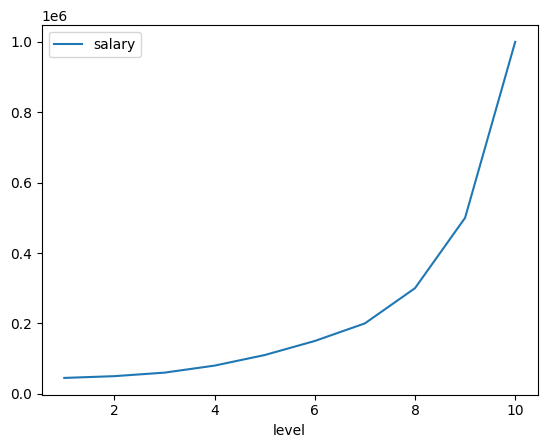

In [126]:
df.set_index("level").plot.line()

### 학습데이터 생성

In [127]:
train = df

In [128]:
x_train = train["level"].values.reshape(-1, 1)

x_train

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [129]:
y_train = train["salary"].values

y_train

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

### 데이터 학습을 통한 모델 생성

In [130]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

### 모델을 활용하여 예측

In [131]:
import numpy as np

test = pd.DataFrame([{
        "position": "Director",
        "level": 6.5,
        "salary": np.nan
}])

test

,position,level,salary
0,Director,6.5,NaN


In [132]:
predicted = model.predict(test["level"].values.reshape(-1, 1))

predicted

array([158300.])

In [133]:
test["salary"] = predicted

test

,position,level,salary
0,Director,6.5,158300.0


In [135]:
df = pd.concat([df, test]).sort_values("level").reset_index(drop=True)

df

,position,level,salary
0,Business Analyst,1.0,45000.0
1,Junior Consultant,2.0,50000.0
2,Senior Consultant,3.0,60000.0
3,Manager,4.0,80000.0
4,Country Manager,5.0,110000.0
5,Region Manager,6.0,150000.0
6,Director,6.5,158300.0
7,Parter,7.0,200000.0
8,Senior Partner,8.0,300000.0
9,C-level,9.0,500000.0


### 결과 시각화

<AxesSubplot:xlabel='level'>

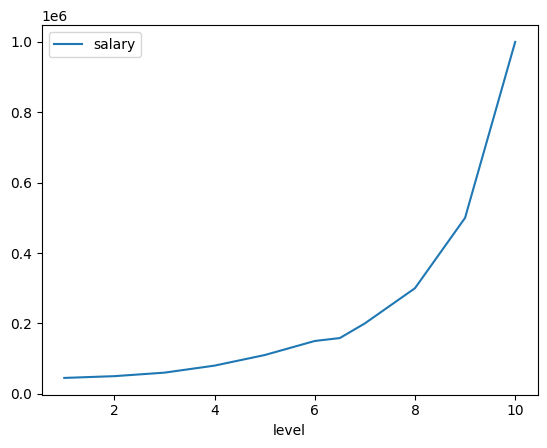

In [137]:
df.set_index("level").plot.line()